# Bibliotecas

In [1]:
# Import libraries 

import yfinance as yf
import numpy as np
import pandas as pd
import pyfolio as pf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy.optimize as sco
plt.style.use('dark_background')

C:\Users\Atos\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


# Set Parameters 

In [2]:
# Define the parameters for downloading data 

stocks = ['KMB', 'LEG', 'BEN', 'FRT', 'AMRC', 'ED', 'IBM', 'CVX', 'XOM', 'T']
start_date = '2014-01-01'
end_date = '2021-12-31'
n_assets = len(stocks)
n_portfolios = 10 ** 5
n_days = 252

# Download Data

In [3]:
# Download the stock prices 

data = yf.download(stocks, start=start_date, end=end_date, ajusted=True)
data.head()

[*********************100%***********************]  10 of 10 completed


Adj Close                                                          \
                AMRC        BEN        CVX         ED        FRT         IBM   
Date                                                                           
2014-01-02      9.78  41.606518  86.935646  39.338589  77.996384  126.900734   
2014-01-03      9.94  41.870594  87.082718  38.966782  78.792603  127.659966   
2014-01-06      9.74  42.031967  86.851624  38.908466  79.820663  127.222198   
2014-01-07      9.95  41.804573  87.586937  39.331306  80.369522  129.759857   
2014-01-08     10.12  41.628521  86.340408  38.937622  79.983009  128.569687   

                                                        ...  Volume           \
                  KMB        LEG          T        XOM  ...    AMRC      BEN   
Date                                                    ...                    
2014-01-02  76.561272  23.432989  21.560204  68.991508  ...   73300  1092100   
2014-01-03  76.937279  23.471203  21.467670  68.825531  ...  105100  1155200   
2014-01-06  76.944672  23.165497  21.566370  68.929268  ...   76400  1409400   
2014-01-07  76.664482  23.264851  21.560204  69.904472  ...   86900  2258900   
2014-01-08  76.148369  23.211351  21.403927  69.676247  ...   79900  1756600   

                                                                           \
                CVX       ED     FRT      IBM      KMB      LEG         T   
Date                                                                        
2014-01-02  4540300  3332700  501800  4755639  1494515   713200  20229900   
2014-01-03  3506000  3774100  374000  4250107  1402001   535500  24618300   
2014-01-06  4252300  2207800  698700  4254919  1647419  1113200  20791500   
2014-01-07  4563300  3040800  529000  6205186  1755369   714700  25725100   
2014-01-08  8282500  2233800  460300  4815470  1933722  1275200  37745500   

                      
                 XOM  
Date                  
2014-01-02  11028100  
2014-01-03   9295600  
2014-01-06  11848500  
2014-01-07  11187000  
2014-01-08  11180400  

[5 rows x 60 columns]

# Check how the stocks performed individualy

In [4]:
df_bt = yf.download(stocks, start=start_date, end=end_date, ajusted=True)['Adj Close']
df_bt

[*********************100%***********************]  10 of 10 completed


,AMRC,BEN,CVX,ED,FRT,IBM,KMB,LEG,T,XOM
Date,,,,,,,,,,
2014-01-02,9.780000,41.606518,86.935661,39.338585,77.996384,126.900711,76.561272,23.432991,21.560204,68.991531
2014-01-03,9.940000,41.870594,87.082756,38.966785,78.792572,127.659950,76.937294,23.471207,21.467670,68.825531
2014-01-06,9.740000,42.031960,86.851631,38.908463,79.820663,127.222237,76.944656,23.165487,21.566370,68.929268
2014-01-07,9.950000,41.804565,87.586945,39.331303,80.369507,129.759842,76.664490,23.264847,21.560204,69.904480
2014-01-08,10.120000,41.628517,86.340408,38.937626,79.983009,128.569656,76.148361,23.211348,21.403927,69.676254
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,77.910004,33.133682,115.200508,82.972862,131.347000,129.075226,137.648956,39.570000,24.374697,60.350952
2021-12-27,80.570000,33.758286,117.555779,82.933250,133.559586,130.053436,138.550827,39.930000,24.286488,61.211414
2021-12-28,78.199997,33.768204,117.328163,83.596870,134.085449,131.051422,138.540909,40.360001,24.325691,61.013607


<function matplotlib.pyplot.show(close=None, block=None)>

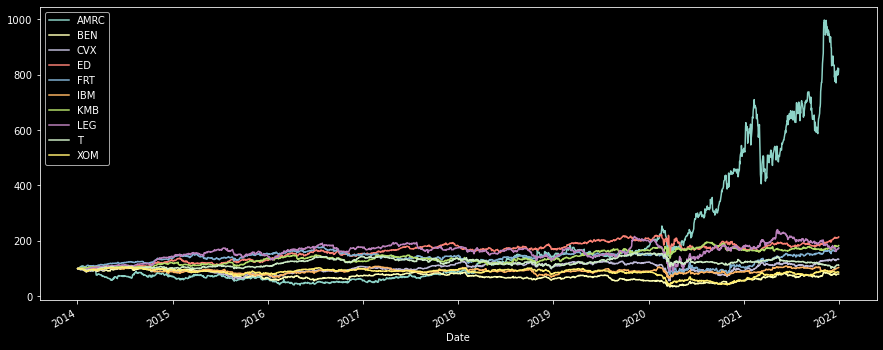

In [5]:
(df_bt / df_bt.iloc[0]*100).plot(figsize= (15,6));
plt.show

# Create new DF

In [6]:
#Create a new df with returns

returns = data['Adj Close'].pct_change().dropna()
returns

,AMRC,BEN,CVX,ED,FRT,IBM,KMB,LEG,T,XOM
Date,,,,,,,,,,
2014-01-03,0.016360,0.006347,0.001691,-0.009451,0.010208,0.005983,0.004911,0.001631,-0.004292,-0.002406
2014-01-06,-0.020121,0.003854,-0.002654,-0.001497,0.013048,-0.003429,0.000096,-0.013025,0.004598,0.001507
2014-01-07,0.021561,-0.005410,0.008466,0.010867,0.006876,0.019946,-0.003641,0.004289,-0.000286,0.014148
2014-01-08,0.017085,-0.004211,-0.014232,-0.010009,-0.004809,-0.009172,-0.006732,-0.002300,-0.007249,-0.003265
2014-01-09,0.007905,0.004758,0.000000,0.003183,-0.001450,-0.003139,0.004357,-0.003293,-0.020444,-0.009728
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,-0.005743,0.016733,0.002411,-0.000954,-0.001433,0.006782,-0.002370,0.002788,0.003632,0.000492
2021-12-27,0.034142,0.018851,0.020445,-0.000477,0.016845,0.007579,0.006552,0.009098,-0.003619,0.014258
2021-12-28,-0.029415,0.000294,-0.001936,0.008002,0.003937,0.007674,-0.000072,0.010769,0.001614,-0.003232


# Check Basic Portfolio Returns

In [7]:
# Define all the portfolio weights

portfolio_weights = n_assets * [1 / n_assets]
portfolio_returns = pd.Series(np.dot(portfolio_weights, returns.T),
 index=returns.index)

In [8]:
portfolio_returns

Date
2014-01-03    0.003098
2014-01-06   -0.001762
2014-01-07    0.007682
2014-01-08   -0.004489
2014-01-09   -0.001785
                ...   
2021-12-23    0.002234
2021-12-27    0.012367
2021-12-28   -0.000237
2021-12-29    0.001977
2021-12-30    0.002401
Length: 2013, dtype: float64

Start date,2014-01-03
End date,2021-12-30
Total months,95
,Backtest
Annual return,8.765%
Cumulative returns,95.655%
Annual volatility,19.092%
Sharpe ratio,0.54
Calmar ratio,0.23
Stability,0.81
Max drawdown,-38.787%


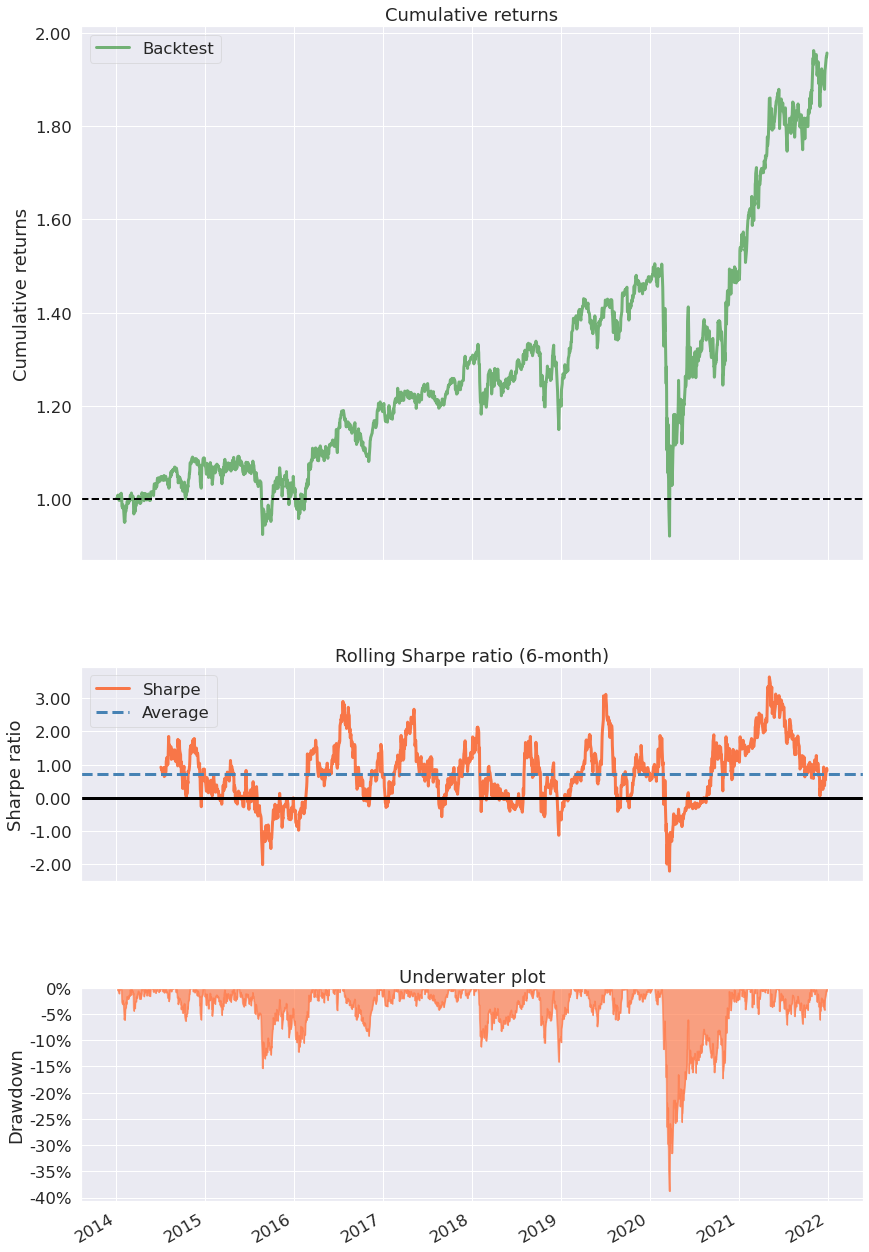

In [9]:
pf.create_simple_tear_sheet(portfolio_returns)

In [10]:
portfolio_returns

Date
2014-01-03    0.003098
2014-01-06   -0.001762
2014-01-07    0.007682
2014-01-08   -0.004489
2014-01-09   -0.001785
                ...   
2021-12-23    0.002234
2021-12-27    0.012367
2021-12-28   -0.000237
2021-12-29    0.001977
2021-12-30    0.002401
Length: 2013, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix')

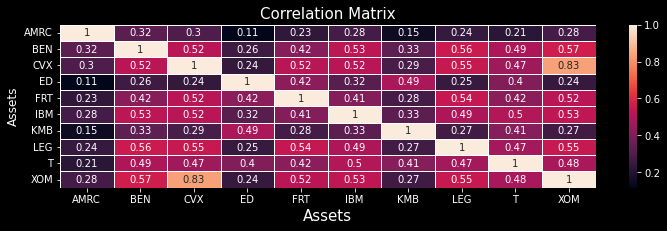

In [11]:
correlation = returns.corr()
f, ax = plt.subplots(figsize=(12, 3))
sns.heatmap(correlation, annot=True, linewidths=.5, ax=ax)
plt.yticks(rotation=0) 
ax.set_ylabel("Assets",fontsize=12)  
ax.set_xlabel("Assets",fontsize=15)  
ax.set_title("Correlation Matrix",fontsize=15) 

# Calculate annualized average returns and the corresponding Covariance


In [12]:
# Calculate average returns

avg_returns = returns.mean() * n_days
avg_returns

AMRC    0.385124
BEN     0.020654
CVX     0.080993
ED      0.117448
FRT     0.112765
IBM     0.034195
KMB     0.095660
LEG     0.120607
T       0.036677
XOM     0.018731
dtype: float64

In [13]:
# calculate covariance 
cov_returns = returns.cov() * n_days
cov_returns

,AMRC,BEN,CVX,ED,FRT,IBM,KMB,LEG,T,XOM
AMRC,0.245554,0.049430,0.043837,0.011881,0.033690,0.032860,0.014662,0.038442,0.021885,0.036722
BEN,0.049430,0.095905,0.048057,0.016895,0.038252,0.039234,0.020297,0.055274,0.031881,0.047428
CVX,0.043837,0.048057,0.088656,0.014759,0.045540,0.036897,0.016931,0.052457,0.028975,0.066451
ED,0.011881,0.016895,0.014759,0.043824,0.026165,0.015857,0.020275,0.016574,0.017525,0.013621
FRT,0.033690,0.038252,0.045540,0.026165,0.087157,0.029131,0.016213,0.051488,0.026046,0.041230
IBM,0.032860,0.039234,0.036897,0.015857,0.029131,0.057536,0.015602,0.037823,0.025195,0.034190
KMB,0.014662,0.020297,0.016931,0.020275,0.016213,0.015602,0.039658,0.017274,0.017181,0.014268
LEG,0.038442,0.055274,0.052457,0.016574,0.051488,0.037823,0.017274,0.102884,0.031540,0.047194
T,0.021885,0.031881,0.028975,0.017525,0.026046,0.025195,0.017181,0.031540,0.043398,0.027078
XOM,0.036722,0.047428,0.066451,0.013621,0.041230,0.034190,0.014268,0.047194,0.027078,0.071953


# Simulate random portfolio weights

In [14]:
np.random.seed(40)
weights = np.random.random(size=(n_portfolios, n_assets))
weights /= np.sum(weights, axis=1)[:, np.newaxis]

# Calculate the portfolio metrics

In [15]:
# calculate the returns by using the appropriate weights
port_ret = np.dot(weights, avg_returns)
port_ret.max()

0.1962474882375282

In [16]:
# Calculate the standard deviation 
port_vol = []
for i in range(0, len(weights)):
    port_vol.append(np.sqrt(np.dot(weights[i].T, np.dot(cov_returns, weights[i]))))

port_vol = np.array(port_vol)
port_vol

array([0.19347938, 0.19539961, 0.18734537, ..., 0.18770065, 0.20102037,
       0.23253836])

In [17]:
# Calculate the perfomance evaluation factor - it measures the excess return (over the risk-free rate) per unit of standard deviation

port_eva_factor = port_ret / port_vol
port_eva_factor

array([0.50972575, 0.60330861, 0.46511467, ..., 0.48380475, 0.63514116,
       0.49650203])

# Create a new DF containing the previous Data

In [18]:
port_results = pd.DataFrame({'returns': port_ret,
                             'volatility': port_vol,
                             'evaluation_factor': port_eva_factor                          
                            })

In [19]:
port_results

,returns,volatility,evaluation_factor
0,0.098621,0.193479,0.509726
1,0.117886,0.195400,0.603309
2,0.087137,0.187345,0.465115
3,0.133369,0.189716,0.702990
4,0.063800,0.208663,0.305754
...,...,...,...
99995,0.109111,0.201950,0.540287
99996,0.066805,0.191690,0.348504
99997,0.090810,0.187701,0.483805
99998,0.127676,0.201020,0.635141


# Create the Efficient Frontier

In [20]:
n_points = 100
port_vol_ef = [] #For each expected return, we found the minimum observable volatility. (ef= efficiente frontier)
indices_skip = [] # In cases where there was no match, as can happen with equally spread points on the linear space, we skipped that point.

port_ret_ef = np.linspace(port_results.returns.min(),    #create an array of expected returns from the sample
                          port_results.returns.max(),
                          n_points)

port_ret_ef = np.round(port_ret_ef, 2) #round the numbers to two decimals, to make the calculations smoother
port_ret = np.round(port_ret, 2)


In [21]:
port_ret_ef.size

100

In [22]:
for point_index in range(n_points):
    if port_ret_ef[point_index] not in port_ret:
        indices_skip.append(point_index)
    match_ind = np.where(port_ret == port_ret_ef[point_index])
    port_vol_ef.append(np.min(port_vol[match_ind]))

    
port_ret_ef = np.delete(port_ret_ef, indices_skip)

# Plot the Efficient Frontier

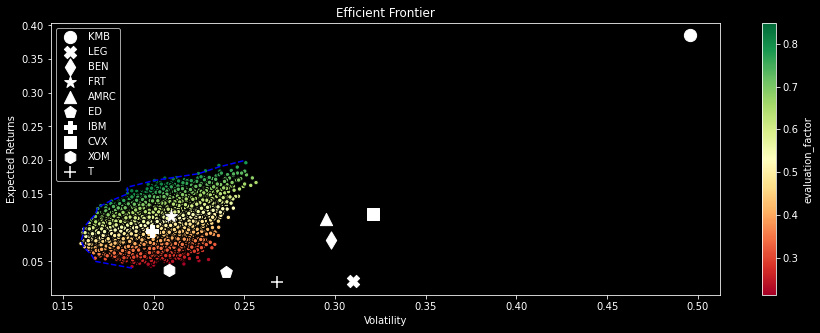

In [23]:
marks = ['o','X','d','*','^','p','P','s','h','+']


plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(15,5))
port_results.plot(kind='scatter', x='volatility', 
                  y='returns', c='evaluation_factor',
                  cmap='RdYlGn', edgecolors='black', ax=ax)

ax.set(xlabel='Volatility',
       ylabel='Expected Returns',
       title='Efficient Frontier')

ax.plot(port_vol_ef, port_ret_ef, 'b--')

for asset_index in range(n_assets):
    ax.scatter(x=np.sqrt(cov_returns.iloc[asset_index, asset_index]),
               y=avg_returns[asset_index],
               marker=marks[asset_index],
               s=150,
               color='white',
               label=stocks[asset_index])
ax.legend();

IndexError: list index out of range

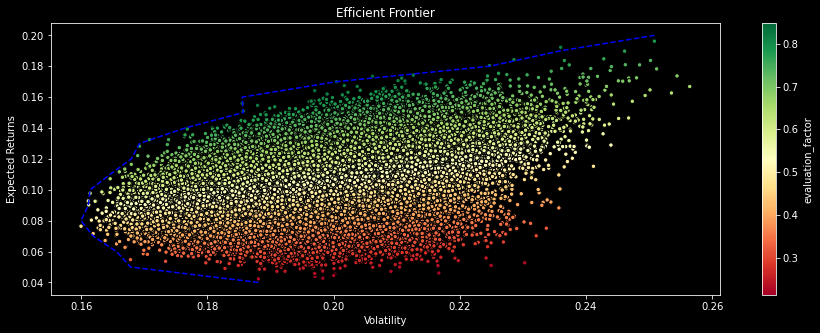

In [48]:
marks = []


plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(15,5))
port_results.plot(kind='scatter', x='volatility', 
                  y='returns', c='evaluation_factor',
                  cmap='RdYlGn', edgecolors='black', ax=ax)

ax.set(xlabel='Volatility',
       ylabel='Expected Returns',
       title='Efficient Frontier')

ax.plot(port_vol_ef, port_ret_ef, 'b--')

for asset_index in range(n_assets):
    ax.scatter(x=np.sqrt(cov_returns.iloc[asset_index, asset_index]),
               y=avg_returns[asset_index],
               marker=marks[asset_index])
#                s=150,
#                color='white',
#                label=stocks[asset_index])
# ax.legend();

# Highest Risk-Return 

In [24]:
# Calculate max evaluation factor/portfolio 

max_factor_index = np.argmax(port_results.evaluation_factor)
max_return_port = port_results.loc[max_factor_index]

In [25]:
# Calculate minimum volatility 

min_vol_index = np.argmin(port_results.volatility)
min_vol_port = port_results.loc[min_vol_index]

# Portfolio Best Final Results between 100.000 portfolios simulation

In [26]:
print('Maximum Evaluation Factor portfolio ----')
print('Performance :')

for index,value in max_return_port.items():
    print(f'{index}: {100* value:.2f}% ', end="", flush=True)

print('\nWeights')
for x,y in zip(stocks, weights[np.argmax(port_results.evaluation_factor)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Maximum Evaluation Factor portfolio ----
Performance :
returns: 17.01% volatility: 20.04% evaluation_factor: 84.85% 
Weights
KMB: 26.63% LEG: 1.85% BEN: 3.78% FRT: 21.73% AMRC: 0.85% ED: 6.35% IBM: 24.68% CVX: 8.30% XOM: 3.91% T: 1.92% 

In [27]:
print('Minimum Volatility portfolio ----')
print('Performance :')

for index,value in min_vol_port.items():
    print(f'{index}: {100* value:.2f}% ', end="", flush=True)

print('\nWeights')
for x,y in zip(stocks, weights[np.argmax(port_results.volatility)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Minimum Volatility portfolio ----
Performance :
returns: 7.64% volatility: 16.00% evaluation_factor: 47.77% 
Weights
KMB: 33.08% LEG: 19.02% BEN: 3.83% FRT: 0.06% AMRC: 8.35% ED: 5.86% IBM: 2.52% CVX: 12.29% XOM: 5.02% T: 9.96% 

# Plot these two portfolios on the Efficient Frontier

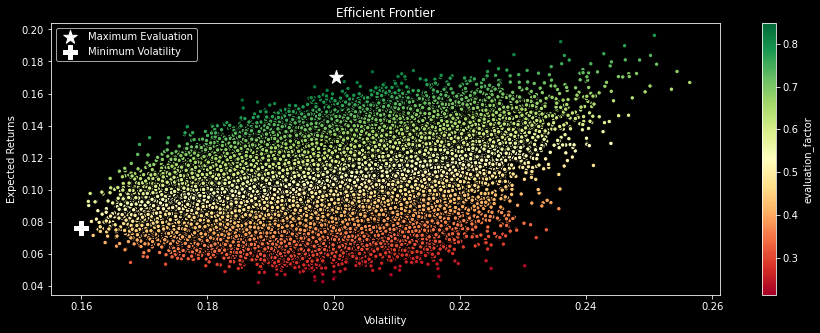

In [28]:
fig, ax = plt.subplots(figsize=(15,5))
port_results.plot(kind='scatter', x='volatility', 
                  y='returns', c='evaluation_factor',
                  cmap='RdYlGn', edgecolors='black', ax=ax)

ax.scatter(x=max_return_port.volatility,
           y=max_return_port.returns,
           c='white', marker='*',
           s=200, label='Maximum Evaluation')
ax.scatter(x=min_vol_port.volatility,
           y=min_vol_port.returns,
           c='white', marker='P',
           s=200, label='Minimum Volatility')
ax.set(xlabel='Volatility', ylabel='Expected Returns',
       title='Efficient Frontier')
ax.legend();
          


In [29]:
port_results

,returns,volatility,evaluation_factor
0,0.098621,0.193479,0.509726
1,0.117886,0.195400,0.603309
2,0.087137,0.187345,0.465115
3,0.133369,0.189716,0.702990
4,0.063800,0.208663,0.305754
...,...,...,...
99995,0.109111,0.201950,0.540287
99996,0.066805,0.191690,0.348504
99997,0.090810,0.187701,0.483805
99998,0.127676,0.201020,0.635141


# Scipy Optimization

### Define two functions to return the expected portfolio return & volatility

In [30]:
def get_port_ret(w, avg_ret):
    return np.sum(avg_ret * w)

def get_port_vol(w, avg_ret, cov_returns):
    return np.sqrt(np.dot(w.T, np.dot(cov_returns, w)))

### Define a function to get Efficient Frontier

In [31]:
def get_ef_frontier(avg_ret, cov_returns, ret_range):
    ef_ports = []
    n_assets = len(avg_returns) 
    args = (avg_returns, cov_returns)
    bounds = tuple((0,1) for asset in range(n_assets))
    initial_guess = n_assets * [1. / n_assets, ]
    for ret in ret_range:
        constraints = ({'type': 'eq', 'fun': lambda x: get_port_ret(x, avg_ret)- ret},
                       {'type':'eq', 'fun': lambda x: np.sum(x)-1})
        ef_port = sco.minimize(get_port_vol, initial_guess, args=args, method='SLSQP', constraints=constraints, bounds=bounds)
        ef_ports.append(ef_port)
    return ef_ports 

# Define range of returns 

ret_range = np.linspace(0, 0.2, 200)

### Create the Efficient Frontier

In [32]:
# Calculate the Efficient Frontier

ef_ports = get_ef_frontier(avg_returns, cov_returns, ret_range)

In [33]:
# Extract the volatilities 

vols_range = [x['fun'] for x in ef_ports]

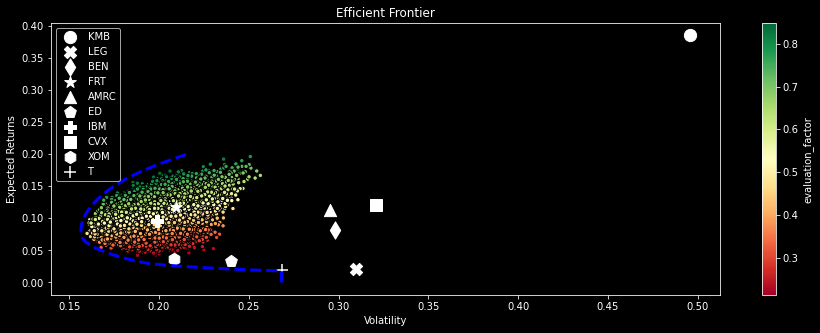

In [34]:
# Plot EF with simulated portfolios
marks = ['o','X','d','*','^','p','P','s','h','+']
fig, ax = plt.subplots(figsize=(15,5))
port_results.plot(kind='scatter', x='volatility', 
                  y='returns', c='evaluation_factor',
                  cmap='RdYlGn', edgecolors='black', ax=ax)

ax.plot(vols_range, ret_range, 'b--', linewidth=3)
ax.set(xlabel='Volatility',
       ylabel='Expected Returns',
       title='Efficient Frontier');

for asset_index in range(n_assets):
    ax.scatter(x=np.sqrt(cov_returns.iloc[asset_index, asset_index]),
               y=avg_returns[asset_index],
               marker=marks[asset_index],
               s=150,
               color='white',
               label=stocks[asset_index])
ax.legend();


### Identify the minimum volatility portfolio

In [35]:
opt_min_vol_ind = np.argmin(vols_range)
opt_min_vol_port_ret = ret_range[opt_min_vol_ind]
opt_min_vol_port_vol = ef_ports[opt_min_vol_ind]['fun']

opt_min_vol_port = {'Return': opt_min_vol_port_ret,
                       'Volatility': opt_min_vol_port_vol,
                       'Evaluation Factor': (opt_min_vol_port_ret/opt_min_vol_port_vol)}

### Identify the maximum return portfolio

In [36]:
# Calculate the negative evaluation factor 

def neg_factor(w, avg_ret, cov_returns, rf_rate):
    opt_port_returns = np.sum(avg_ret * w)
    opt_port_vol = np.sqrt(np.dot(w.T, np.dot(cov_returns, w)))
    opt_eva_factor = (opt_port_returns - rf_rate) / opt_port_vol
    return -opt_eva_factor

In [37]:
# Find the optimized portfolio 

n_assets = len(avg_returns)
rf_rate = 0

args = (avg_returns, cov_returns, rf_rate)
constraints = ({'type': 'eq',
                'fun': lambda x: np.sum(x) -1})
bounds = tuple((0,1) for asset in range(n_assets))
initial_guess = n_assets * [1. / n_assets]

opt_max_factor = sco.minimize(neg_factor,
                              x0=initial_guess,
                              args=args,
                              method='SLSQP',
                              bounds=bounds,
                              constraints=constraints)                           
                             

In [38]:
# Extract info about maximum factor portfolio

opt_max_factor_w = opt_max_factor['x']
opt_max_factor = {'Return': get_port_ret(opt_max_factor_w, avg_returns),
                  'Volatility': get_port_vol(opt_max_factor_w, avg_returns, cov_returns),
                  'Evaluation Factor': -opt_max_factor['fun']}

In [39]:
opt_max_factor

{'Return': 0.19997022309070245,
 'Volatility': 0.21564506764119468,
 'Evaluation Factor': 0.9273118336442866}

# Print Minimum Volatility & Maximum Return Portfolios

In [40]:
# Minimum Vol portfolio

print('Minimum volatility portfolio ----')
print('Performance')
for index, value in opt_min_vol_port.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
    
print('\nWeights')
for x, y in zip(stocks, ef_ports[opt_min_vol_ind]['x']):
    print(f'{x}: {100 *y:.2f}% ', end="", flush=True)

Minimum volatility portfolio ----
Performance
Return: 8.14% Volatility: 15.66% Evaluation Factor: 51.99% 
Weights
KMB: 2.12% LEG: 0.00% BEN: 0.00% FRT: 25.80% AMRC: 0.00% ED: 11.72% IBM: 31.14% CVX: 0.00% XOM: 20.50% T: 8.72% 

In [41]:
print('\nWeights')
for x, y in zip(stocks, ef_ports[opt_min_vol_ind]['x']):
    print(f'{y:.4f}, ', end="", flush=True)


Weights
0.0212, 0.0000, 0.0000, 0.2580, 0.0000, 0.1172, 0.3114, 0.0000, 0.2050, 0.0872, 

In [42]:
# Maximum return portfolio

print('Maximum Evaluation Factor portfolio ----')
print('Performance :')

for index,value in opt_max_factor.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)

print('\nWeights')
for x,y  in zip(stocks, opt_max_factor_w):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Maximum Evaluation Factor portfolio ----
Performance :
Return: 20.00% Volatility: 21.56% Evaluation Factor: 92.73% 
Weights
KMB: 32.43% LEG: 0.00% BEN: 0.00% FRT: 42.31% AMRC: 0.00% ED: 0.00% IBM: 20.34% CVX: 4.93% XOM: 0.00% T: 0.00% 

# Plot these portfolios + efficient frontier

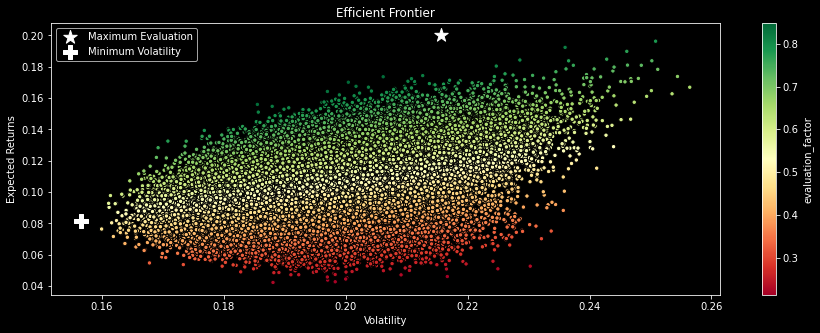

In [43]:
fig, ax = plt.subplots(figsize=(15,5))
port_results.plot(kind='scatter', x='volatility', 
                  y='returns', c='evaluation_factor',
                  cmap='RdYlGn', edgecolors='black', ax=ax)

ax.scatter(x=get_port_vol(opt_max_factor_w, avg_returns, cov_returns),
           y=get_port_ret(opt_max_factor_w, avg_returns),
           c='white', marker='*',
           s=200, label='Maximum Evaluation')
ax.scatter(x=opt_min_vol_port_vol,
           y=opt_min_vol_port_ret,
           c='white', marker='P',
           s=200, label='Minimum Volatility')
ax.set(xlabel='Volatility', ylabel='Expected Returns',
       title='Efficient Frontier')
ax.legend();

# Efficient Frontier Backtesting

In [ ]:
# Define the parameters for downloading data 

stocks_bt = ['KMB', 'LEG', 'BEN', 'FRT', 'AMRC', 'ED', 'IBM', 'CVX', 'XOM', 'T']
weights_bt = np.array([0.0018, 0.0000, 0.0000, 0.2818, 0.0000, 0.1349, 0.3117, 0.0000, 0.1987, 0.0710])
start_date_bt = '2021-01-01'
end_date_bt = '2021-12-31'


In [ ]:
# Weights mistake checker

weights_bt.sum()

In [ ]:
# Download Data for backtesting 

df_bt = yf.download(stocks_bt, start=start_date_bt, end=end_date_bt, ajusted=True)['Adj Close'].dropna()
df_bt.head()

In [ ]:
# Check how the stocks performed individualy 
(df_bt / df_bt.iloc[0]*100).plot(figsize= (15,6));
plt.show

In [ ]:
#Create a new df with returns

returns_ef = df_bt.pct_change().dropna()
returns_ef

In [ ]:
# Annualize the returns

annual_returns = returns_ef.mean() * 252
annual_returns

In [ ]:
portfolio_2021 = pd.Series(np.dot(weights_bt, returns_ef.T), index=returns_ef.index)
portfolio_2021

In [ ]:
daily_ret  = pd.DataFrame({'Date':portfolio_2021.index, 'Daily Pct Returns':portfolio_2021.values})
daily_ret['Daily Pct Returns'] = daily_ret['Daily Pct Returns'] 
daily_ret.to_csv('2021_daily.csv') 

In [ ]:
pf.create_returns_tear_sheet(portfolio_2021)

# Create the Final DataFrame 

In [ ]:
final_df = pd.read_csv('C:/Users/Atos/Desktop/Estudo Python Comunidade/Portfolio/Markowitz/8yrs_markov_min.csv', index_col=False)

In [ ]:
final_df

In [ ]:
final_df.drop('Unnamed: 0', 1, inplace=True)

In [ ]:
final_df

In [ ]:
final_df.to_csv('the_last_one_markov_MIN.csv')

# 8 YEARS RESULTS

In [ ]:
ts = pd.Series(final_df['Daily Pct Returns'].values, index=pd.to_datetime(final_df['Date']))

In [ ]:
ts

In [ ]:
pf.create_simple_tear_sheet(ts)